# **Importing Libraries and Files**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Basic Info about the Data Set
# sibsp	# of siblings / spouses aboard the Titanic	
# parch	# of parents / children aboard the Titanic	
# pclass	Ticket class

In [3]:
df_test=pd.read_csv('test (2).csv')

In [4]:
df_train=pd.read_csv("train.csv")

# **Removing Missing Data**

In [5]:
def missing_values(x):
  x=x.interpolate()
  return x


In [6]:
df_test=missing_values(df_test)
df_test=df_test.drop(columns=['Cabin','PassengerId','Ticket','Name'])
df_test.isnull().sum()


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [7]:
df_train=missing_values(df_train)
df_train=df_train.drop(columns=['Cabin','PassengerId','Ticket','Name'])
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [8]:
df_train['Embarked'].describe()


count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [9]:
df_train['Embarked'].fillna('S',inplace=True)


In [10]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# **Encoding Data with Numerical Values**


In [11]:
def change_gender(x):
    if x == 'male':
        return 0
    elif x == 'female':
        return 1

In [12]:
df_train['Sex']=df_train['Sex'].apply(change_gender)
df_test['Sex']=df_test['Sex'].apply(change_gender)

In [13]:
change = {'S':1,'C':2,'Q':0}
df_train['Embarked']=df_train['Embarked'].map(change)
df_test['Embarked']=df_test['Embarked'].map(change)

In [14]:
df_train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1


In [15]:
df_test.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,0
1,3,1,47.0,1,0,7.0000,1
2,2,0,62.0,0,0,9.6875,0
3,3,0,27.0,0,0,8.6625,1
4,3,1,22.0,1,1,12.2875,1


# **Visualization of the Data**

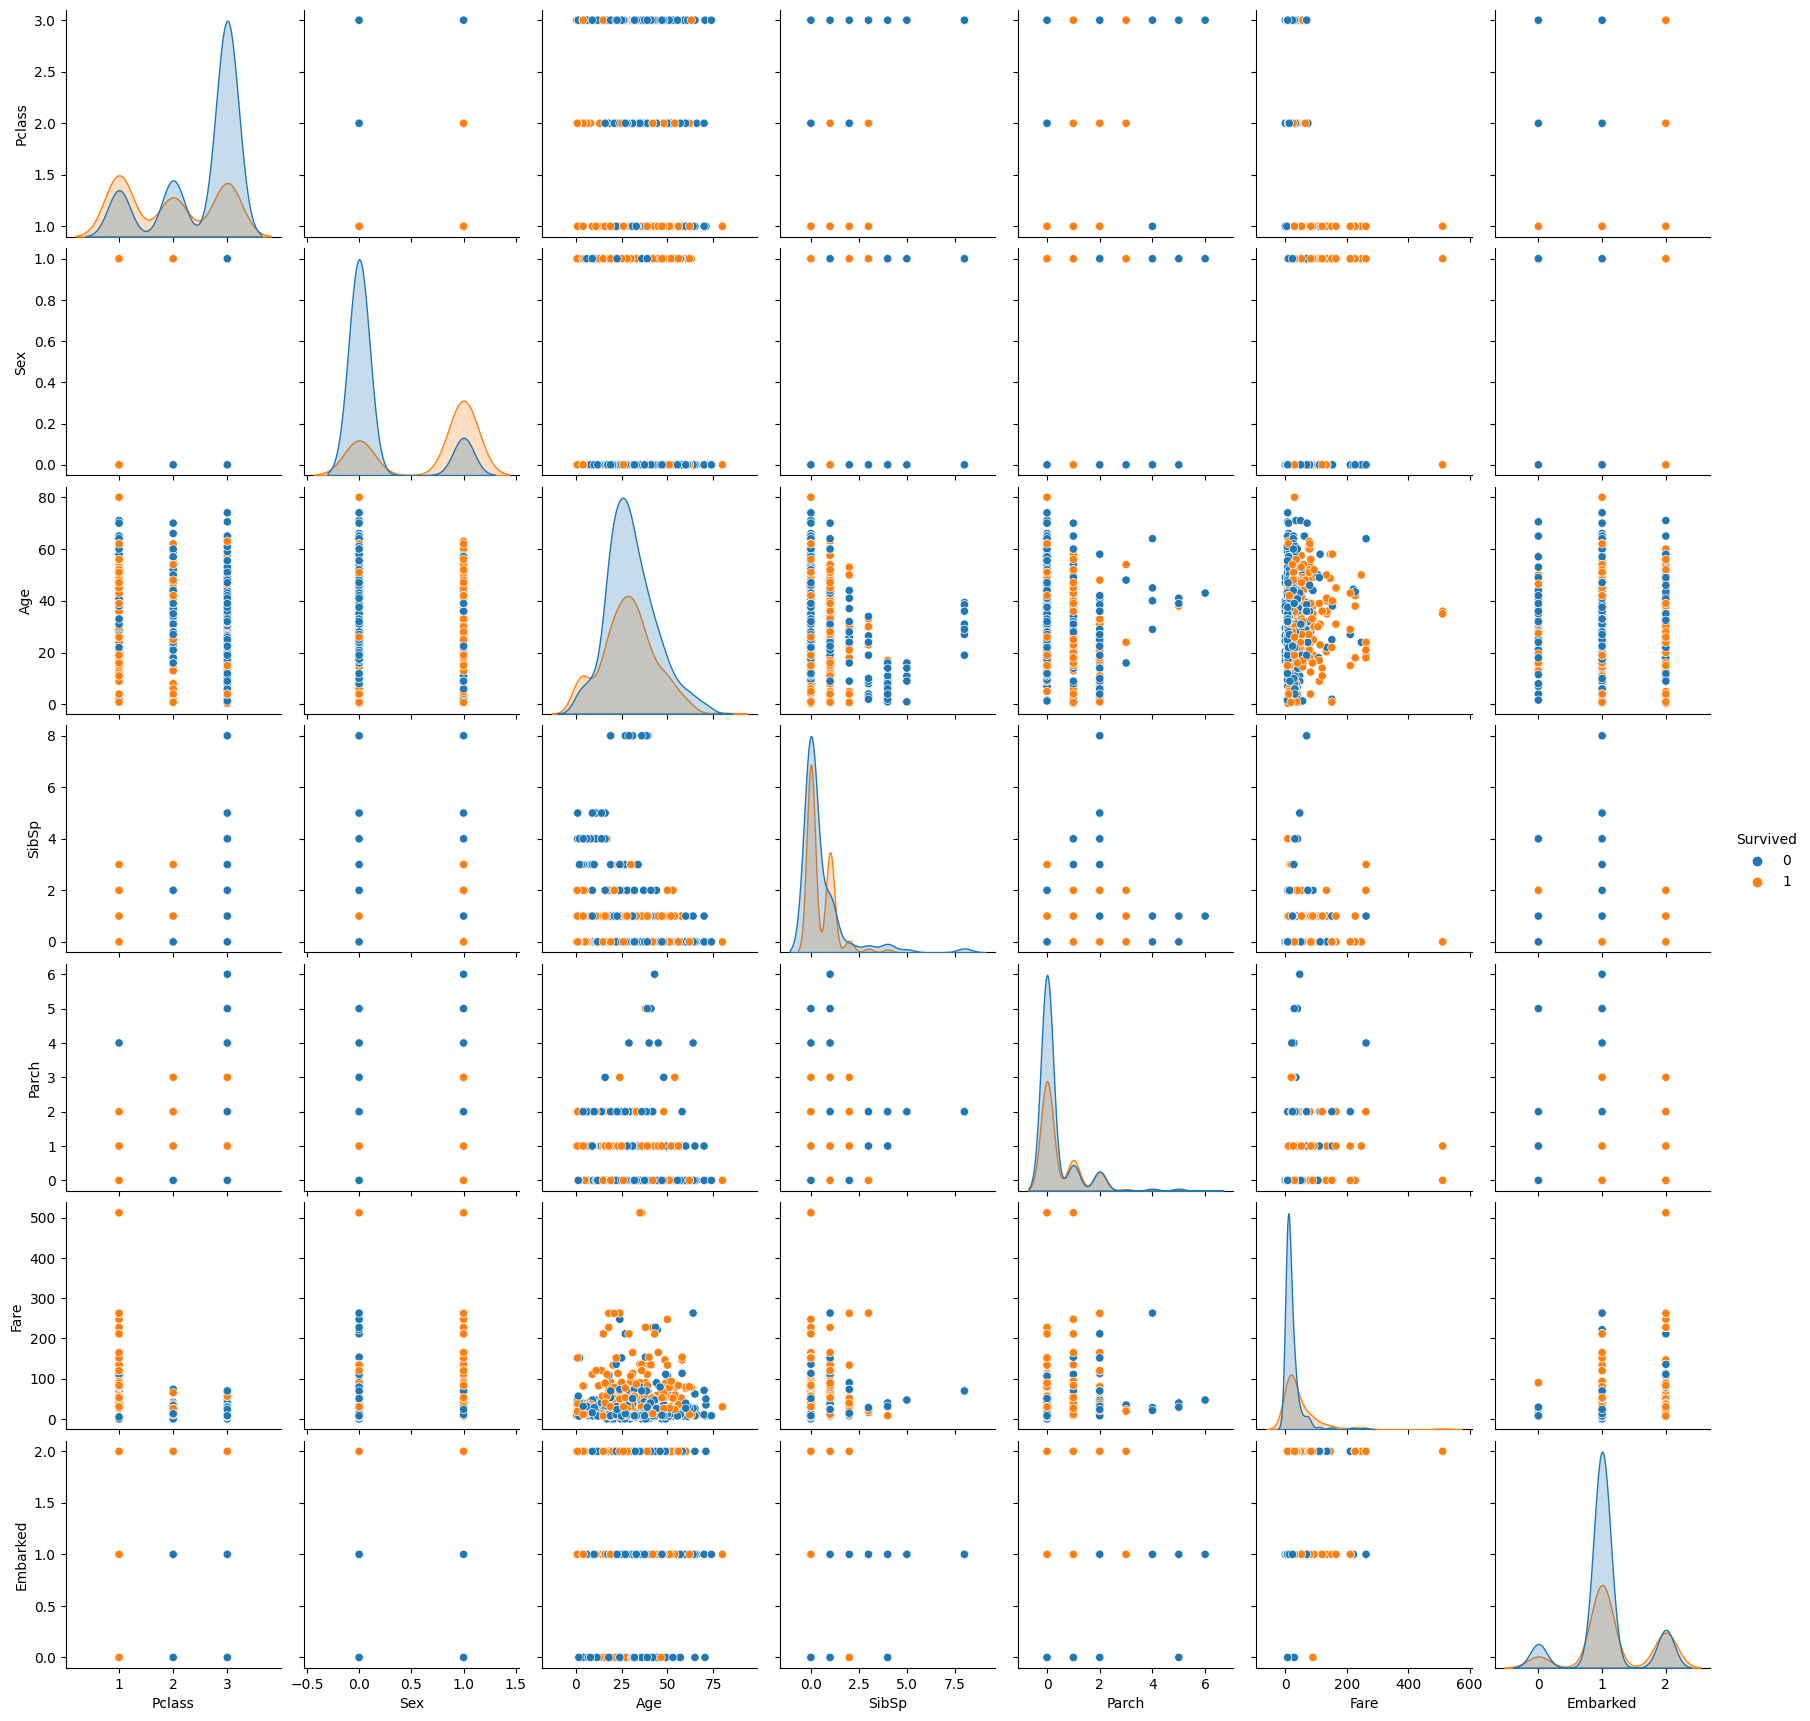

In [16]:
sns.pairplot(df_train, hue="Survived")

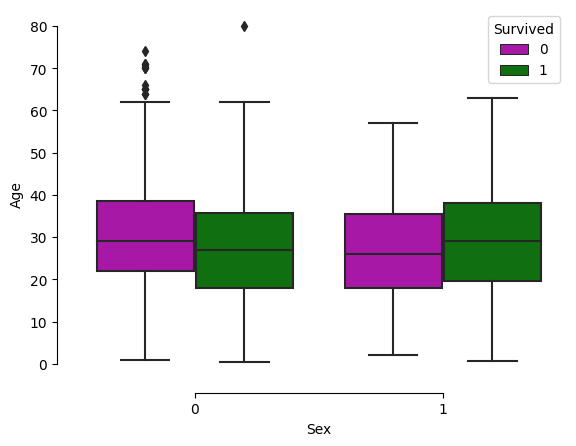

In [17]:
sns.boxplot(x="Sex", y="Age",
            hue="Survived", palette=["m", "g"],
            data=df_train)
sns.despine(offset=10, trim=True)

<Axes: >

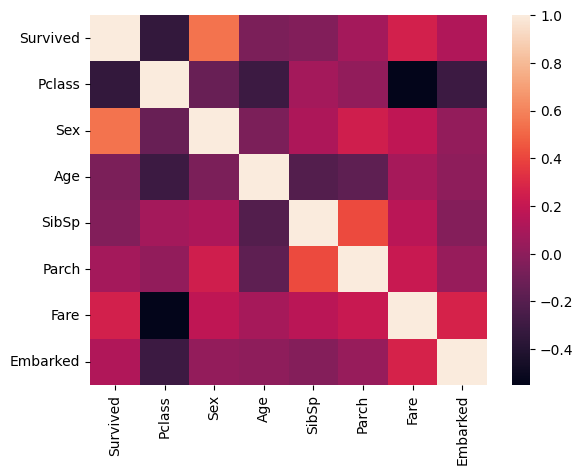

In [18]:
sns.heatmap(df_train.corr())

<Axes: xlabel='Pclass', ylabel='Count'>

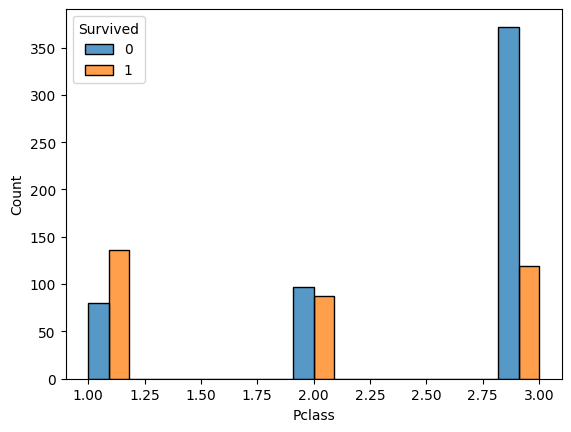

In [19]:
sns.histplot(data=df_train,x='Pclass',hue='Survived',multiple="dodge")

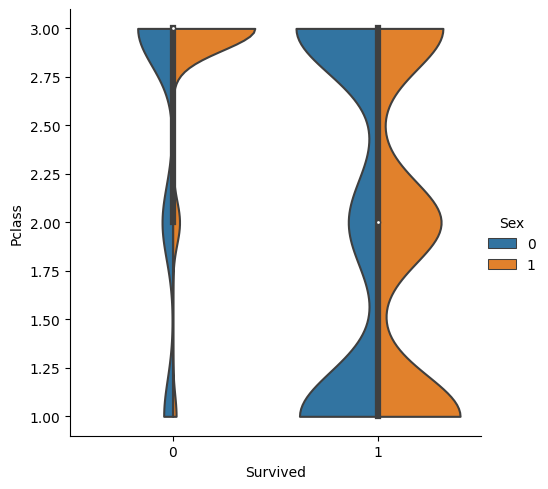

In [20]:
sns.catplot(data=df_train,x='Survived',y='Pclass',hue='Sex', kind="violin", bw=.25, cut=0, split=True,)

# **Building Neural Network**

In [56]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers.core import Dense
import keras
from keras.optimizers import *
from keras.initializers import *
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential
from sklearn.metrics import classification_report
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score


In [22]:
X_train=df_train.drop("Survived",axis=1)
Y_train=df_train['Survived']
x_test=df_test

In [23]:
print(X_train.shape)
print(Y_train.shape)
print(x_test.shape)

(891, 7)
(891,)
(418, 7)


In [24]:
model=Sequential()
model.add(Dense(128, input_shape=(7,), activation='relu'))
model.add(Dense(512, activation='relu',use_bias = False, kernel_initializer='he_normal'))
model.add(Dense(64, activation='relu',use_bias = False, kernel_initializer='he_normal'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(128, activation='relu',use_bias = False, kernel_initializer='he_normal'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu', kernel_initializer='he_normal',use_bias = False))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu', kernel_initializer='he_normal',use_bias = False))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal',use_bias = False))
model.add(Dense(1, activation='sigmoid'))


In [25]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size = 128, verbose = 2, epochs = 120)

Epoch 1/120
7/7 - 2s - loss: 0.6593 - accuracy: 0.6465 - 2s/epoch - 276ms/step
Epoch 2/120
7/7 - 0s - loss: 0.6364 - accuracy: 0.6476 - 66ms/epoch - 9ms/step
Epoch 3/120
7/7 - 0s - loss: 0.6169 - accuracy: 0.6700 - 57ms/epoch - 8ms/step
Epoch 4/120
7/7 - 0s - loss: 0.6056 - accuracy: 0.6723 - 62ms/epoch - 9ms/step
Epoch 5/120
7/7 - 0s - loss: 0.5967 - accuracy: 0.7003 - 60ms/epoch - 9ms/step
Epoch 6/120
7/7 - 0s - loss: 0.6062 - accuracy: 0.6869 - 60ms/epoch - 9ms/step
Epoch 7/120
7/7 - 0s - loss: 0.5926 - accuracy: 0.6801 - 74ms/epoch - 11ms/step
Epoch 8/120
7/7 - 0s - loss: 0.5945 - accuracy: 0.6835 - 67ms/epoch - 10ms/step
Epoch 9/120
7/7 - 0s - loss: 0.5865 - accuracy: 0.6970 - 57ms/epoch - 8ms/step
Epoch 10/120
7/7 - 0s - loss: 0.5759 - accuracy: 0.7160 - 71ms/epoch - 10ms/step
Epoch 11/120
7/7 - 0s - loss: 0.5540 - accuracy: 0.7351 - 64ms/epoch - 9ms/step
Epoch 12/120
7/7 - 0s - loss: 0.5395 - accuracy: 0.7565 - 60ms/epoch - 9ms/step
Epoch 13/120
7/7 - 0s - loss: 0.5309 - accurac

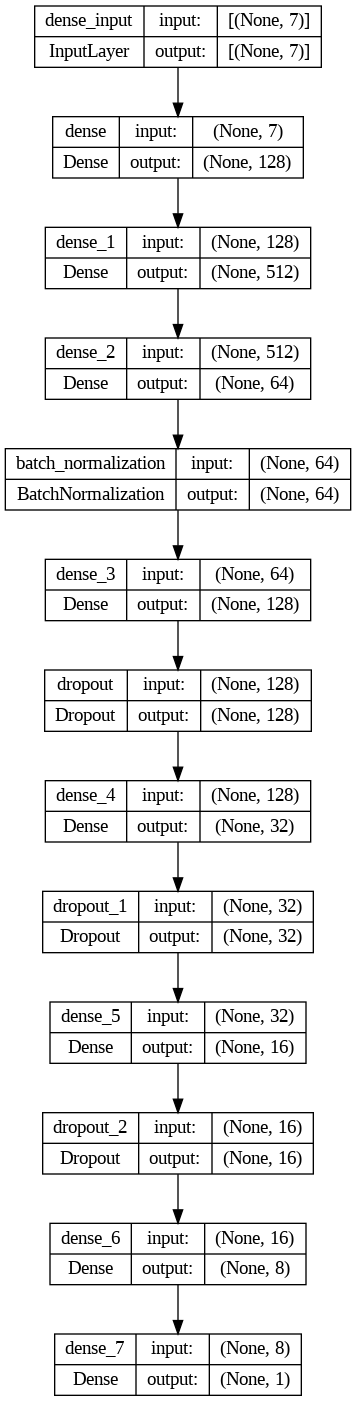

In [26]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [27]:
predict = model.predict(x_test)
#since we have use sigmoid activation function in output layer
predict = (predict > 0.5).astype(int).ravel()
print(predict)
print(df_train['Survived'])

14/14 [==============================] - 0s 2ms/step
[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0

# **Prediction Using Pycaret**

In [28]:
# pip install --pre -U pycaret

In [40]:
from pycaret.classification import *
s = setup(df_train, target = 'Survived')

,Description,Value
0,Session id,8725
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 8)"
4,Transformed data shape,"(891, 8)"
5,Transformed train set shape,"(623, 8)"
6,Transformed test set shape,"(268, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [41]:
best=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8217,0.8546,0.6688,0.8419,0.7391,0.6074,0.6214,0.3300
qda,Quadratic Discriminant Analysis,0.8185,0.8535,0.7027,0.8036,0.7475,0.6070,0.6124,0.1500
xgboost,Extreme Gradient Boosting,0.8154,0.8392,0.7192,0.7886,0.7487,0.6036,0.6085,0.1830
lightgbm,Light Gradient Boosting Machine,0.8089,0.8473,0.6984,0.7883,0.7368,0.5883,0.5940,0.1520
rf,Random Forest Classifier,0.7994,0.8446,0.7152,0.7607,0.7332,0.5731,0.5775,0.6050
ridge,Ridge Classifier,0.7976,0.0000,0.6810,0.7629,0.7182,0.5614,0.5645,0.0760
lda,Linear Discriminant Analysis,0.7976,0.8560,0.6810,0.7629,0.7182,0.5614,0.5645,0.0920
lr,Logistic Regression,0.7961,0.8552,0.6857,0.7600,0.7196,0.5603,0.5632,0.1940
nb,Naive Bayes,0.7961,0.8376,0.7069,0.7502,0.7261,0.5641,0.5664,0.0840
ada,Ada Boost Classifier,0.7961,0.8457,0.7069,0.7501,0.7257,0.5639,0.5665,0.3470


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [47]:
prediction_train=predict_model(best,data=df_train)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8676,0.9316,0.7281,0.9088,0.8084,0.7091,0.7193


In [48]:
prediction_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,prediction_label,prediction_score
0,3,0,22.0,1,0,7.250000,1,0,0,0.9306
1,1,1,38.0,1,0,71.283302,2,1,1,0.9543
2,3,1,26.0,0,0,7.925000,1,1,0,0.5197
3,1,1,35.0,1,0,53.099998,1,1,1,0.9639
4,3,0,35.0,0,0,8.050000,1,0,0,0.8919
...,...,...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.000000,1,0,0,0.8362
887,1,1,19.0,0,0,30.000000,1,1,1,0.9458
888,3,1,22.5,1,2,23.450001,1,0,0,0.8211
889,1,0,26.0,0,0,30.000000,2,1,1,0.6702


In [49]:
prediction_test=predict_model(best,data=df_test)

In [50]:
prediction_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,prediction_label,prediction_score
0,3,0,34.5,0,0,7.829200,0,0,0.9000
1,3,1,47.0,1,0,7.000000,1,1,0.9289
2,2,0,62.0,0,0,9.687500,0,0,0.7238
3,3,0,27.0,0,0,8.662500,1,0,0.8631
4,3,1,22.0,1,1,12.287500,1,0,0.7170
...,...,...,...,...,...,...,...,...,...
413,3,0,33.5,0,0,8.050000,1,0,0.8919
414,1,1,39.0,0,0,108.900002,2,1,0.9535
415,3,0,38.5,0,0,7.250000,1,0,0.9349
416,3,0,38.5,0,0,8.050000,1,0,0.9107


# **Prediction using GradientBoosting**

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )
gbc.fit(X_train,Y_train)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='log_loss', max_depth=3,
                           max_features=5, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=500, n_iter_no_change=None,
                           random_state=100, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [60]:
print("Accuracy score (training): {0:.3f}".format(gbc.score(X_train, Y_train)))

Accuracy score (training): 0.928


In [55]:
gbc.predict(x_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,